In [1]:
from sklearn.datasets import make_regression
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
X,y= make_regression(n_samples=1000, n_features=20,n_informative=20,noise=10)

In [3]:
#normalize 
X= (X-X.mean())/X.std()
X.shape

(1000, 20)

In [4]:
X=np.hstack((X,np.ones((X.shape[0],1))))

In [5]:
X.shape,y.shape

((1000, 21), (1000,))

In [6]:
def hypothesis(X,theta):
    return np.dot(X,theta)
def grad (X,y,theta):
    y_=hypothesis(X,theta)
    m=X.shape[0]
    grad=np.dot(X.T,y_-y)
    return grad/m

In [7]:
def error(X,y,theta):
    m=X.shape[0]
    y_=hypothesis(X,theta)
    error=np.sum((y_-y)**2)
    return error/m    

In [11]:
def minibatchgrad(X,y,lr=0.1,batch_size=50,max_iter=100):
    error_list=[]
    theta=np.zeros((X.shape[1],))
    data=np.hstack((X,y.reshape(-1,1)))
    for e in range(max_iter):
        np.random.shuffle(data)
        m=data.shape[0]
        total_batches=m//batch_size
        for i in range(total_batches):
            batch_data=data[i*batch_size:(i+1)*batch_size]
            X_batch=batch_data[:,:-1]
            y_batch=batch_data[:,-1]
            batch_gradient=grad(X_batch,y_batch,theta)
            theta=theta-lr*batch_gradient
            err=error(X_batch,y_batch,theta)
            error_list.append(err)
    return error_list,theta

In [12]:
error_list,theta=minibatchgrad(X,y)

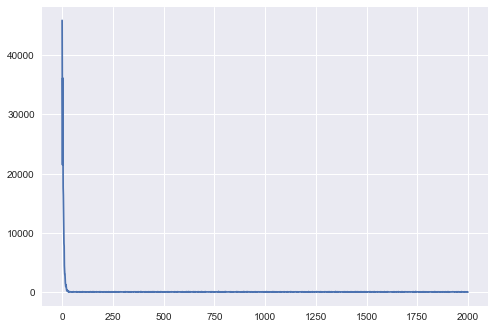

In [13]:
plt.style.use('seaborn')
plt.plot(error_list)